In [2]:
import pandas as pd

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [3]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [4]:
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [5]:
sample_b.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [6]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format = '%Y-%m-%d')

In [7]:
sample_b['date'] = pd.to_datetime(sample_b['date'], format = '%Y-%m-%d')

In [8]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [9]:
daily_data_a = sample_a.groupby('date').agg({'cid':'count', 'transactions': 'sum', 'revenue': 'sum'})
daily_data_a

,cid,transactions,revenue
date,,,
2020-11-06,2576,16,1577279
2020-11-07,2704,23,1721886
2020-11-08,3354,25,846051
2020-11-09,3234,18,708830
2020-11-10,3022,29,826984
2020-11-11,3218,19,1209656
2020-11-12,3467,19,607839
2020-11-13,3676,36,1338816
2020-11-14,3372,30,2659277


In [10]:
daily_data_b = sample_b.groupby('date').agg({'cid':'count', 'transactions': 'sum', 'revenue': 'sum'})
daily_data_b

,cid,transactions,revenue
date,,,
2020-11-06,2499,19,996645
2020-11-07,2804,19,555499
2020-11-08,3291,24,3044842
2020-11-09,3062,25,1285836
2020-11-10,3072,30,2414726
2020-11-11,3208,22,3555727
2020-11-12,3494,25,915653
2020-11-13,3606,37,1703475
2020-11-14,3276,34,2369998


In [11]:
daily_data_a['cum_cid'] = daily_data_a['cid'].cumsum()

In [12]:
daily_data_a['cum_transactions'] = daily_data_a['transactions'].cumsum()
daily_data_a['cum_revenue'] = daily_data_a['revenue'].cumsum()

In [13]:
daily_data_a

,cid,transactions,revenue,cum_cid,cum_transactions,cum_revenue
date,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279
2020-11-07,2704,23,1721886,5280,39,3299165
2020-11-08,3354,25,846051,8634,64,4145216
2020-11-09,3234,18,708830,11868,82,4854046
2020-11-10,3022,29,826984,14890,111,5681030
2020-11-11,3218,19,1209656,18108,130,6890686
2020-11-12,3467,19,607839,21575,149,7498525
2020-11-13,3676,36,1338816,25251,185,8837341
2020-11-14,3372,30,2659277,28623,215,11496618


In [14]:
daily_data_b['cum_cid'] = daily_data_b['cid'].cumsum()
daily_data_b['cum_transactions'] = daily_data_b['transactions'].cumsum()
daily_data_b['cum_revenue'] = daily_data_b['revenue'].cumsum()
daily_data_b


,cid,transactions,revenue,cum_cid,cum_transactions,cum_revenue
date,,,,,,
2020-11-06,2499,19,996645,2499,19,996645
2020-11-07,2804,19,555499,5303,38,1552144
2020-11-08,3291,24,3044842,8594,62,4596986
2020-11-09,3062,25,1285836,11656,87,5882822
2020-11-10,3072,30,2414726,14728,117,8297548
2020-11-11,3208,22,3555727,17936,139,11853275
2020-11-12,3494,25,915653,21430,164,12768928
2020-11-13,3606,37,1703475,25036,201,14472403
2020-11-14,3276,34,2369998,28312,235,16842401


In [15]:
daily_data_a['cum_conversion'] = daily_data_a['cum_transactions']/daily_data_a['cum_cid']*100
daily_data_a['cum_mean_check'] = daily_data_a['cum_revenue']/daily_data_a['cum_transactions']
daily_data_a

,cid,transactions,revenue,cum_cid,cum_transactions,cum_revenue,cum_conversion,cum_mean_check
date,,,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450
2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923
2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141
2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811
2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860


In [16]:
daily_data_b['cum_conversion'] = daily_data_b['cum_transactions']/daily_data_b['cum_cid']*100
daily_data_b['cum_mean_check'] = daily_data_b['cum_revenue']/daily_data_b['cum_transactions']
daily_data_b

,cid,transactions,revenue,cum_cid,cum_transactions,cum_revenue,cum_conversion,cum_mean_check
date,,,,,,,,
2020-11-06,2499,19,996645,2499,19,996645,0.760304,52455.000000
2020-11-07,2804,19,555499,5303,38,1552144,0.716576,40845.894737
2020-11-08,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
2020-11-09,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
2020-11-10,3072,30,2414726,14728,117,8297548,0.794405,70919.213675
2020-11-11,3208,22,3555727,17936,139,11853275,0.774978,85275.359712
2020-11-12,3494,25,915653,21430,164,12768928,0.765282,77859.317073
2020-11-13,3606,37,1703475,25036,201,14472403,0.802844,72002.004975
2020-11-14,3276,34,2369998,28312,235,16842401,0.830037,71669.791489


In [17]:
print(daily_data_a['cum_conversion'].mean())
print(daily_data_b['cum_conversion'].mean())

0.7127554606160045
0.7621783890588011


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

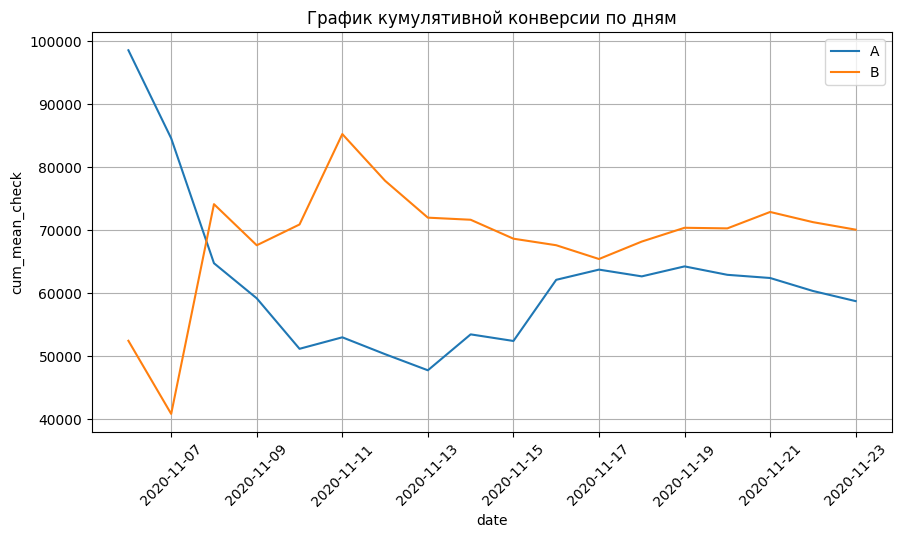

In [19]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_check', data=daily_data_a, ax=ax, label='A')
sns.lineplot(x='date', y='cum_mean_check', data=daily_data_b, ax=ax, label='B')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

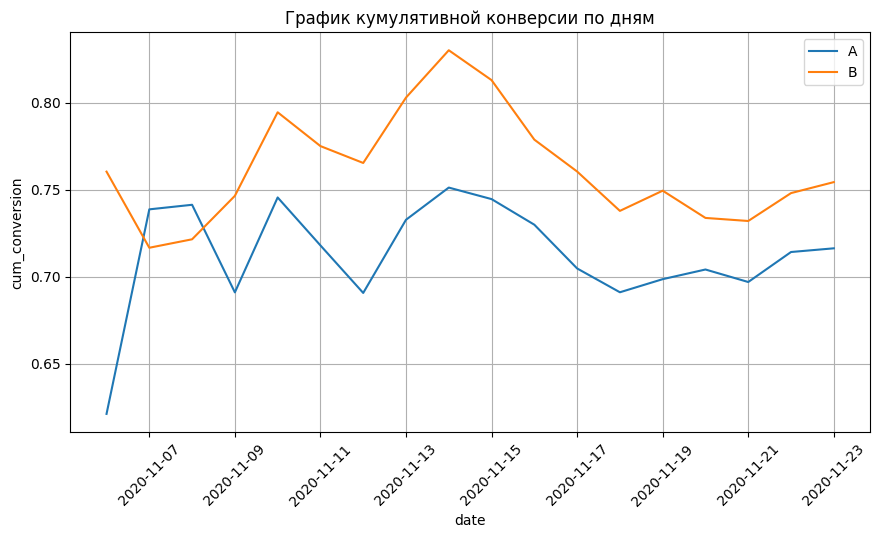

In [20]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_data_a, ax=ax, label='A')
sns.lineplot(x='date', y='cum_conversion', data=daily_data_b, ax=ax, label='B')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);